# **Data science workshop project**
**Team:** Elad, Tsach, Oz, Eva

**Problem:** The predictors of in-hospital mortality for admitted patients remain poorly characterized.

**Goal of the project**: We aimed to develop and validate a prediction model for all-cause in-hospital mortality among admitted patients.


# **Part 1- Data analysis**

**Goal of this part: Understand the data to build a better model of prediction of hospital death**


# Part 1.1 Understand the dataset

link of the dataset: https://www.kaggle.com/datasets/mitishaagarwal/patient
**Main information about the dataset used:**
- 85 features in the original dataset
- not separated in train / test / validation
- problem of classification : hospital death or not based on informtion of patient collected at the time of hospitalization
- each row in the dataset is a patient and value for different features (related to his health state during his hospitalization) 

In [151]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
#import plotly.expess as px -not working in Eva after installing with: pip install plotly

#Machine learning library
import sklearn
from sklearn import preprocessing



## Data Loading

In [152]:
complete_data = pd.read_csv('dataset.csv') #load the dataset

In [153]:
complete_data.head() #beginning of the dataset

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


We can see that there are many features with different type of representations:
    - numerical data
    - categorical data
    - binary data
Also, we can see that there are missing values: not each hospital have the possibility to collect all same data for all patients because of difference reason (urgence, unable to measure,...)

In [154]:
complete_data.shape   #dataset sizes: 85 columns and 91713 rows/patients in the original dataset

(91713, 85)

In [155]:
#column / features and data types
complete_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

Many features are for people which didn t learn medicine non undrstandable, so we will try to understand them in order to clean them better.
We build another document called "Medical information important for the project" which explain these features.

From researches :

"*The APACHE III systems has greater discriminative power than the APACHE II systems for predicting in-hospital mortality. The variables of oxygenation, mean artery pressure, respiratory rate, serum creatinine concentration, and Glasgow Coma Scale play important roles in predicting survival for patients with respiratory failure.*"

In [156]:
complete_data.describe() #only for numerical data

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,Unnamed: 83,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,...,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,0.0,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,...,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,NaN,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,...,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,NaN,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,32852.000000,32830.000000,47.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,66.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
50%,65665.000000,65413.000000,109.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,80.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
75%,98342.000000,98298.000000,161.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,97.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
max,131051.000000,131051.000000,204.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000


Scale of features are really differents, so maybe need of normalization.
Some are continuous or binary.

In [157]:
class_prediction = "hospital_death" #label
#binary : 0 (no hospital death = living) or 1 (hospital death), is a column / feature in the dataset

In [158]:
complete_data["hospital_death"].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

([<matplotlib.patches.Wedge at 0x1b39e3abe80>,
 [Text(-1.0598172020063896, 0.294597179774939, '0'),
  Text(1.0598172295885635, -0.2945970805476902, '1')],
 [Text(-0.5780821101853033, 0.16068937078633036, '91.4%'),
  Text(0.5780821252301255, -0.16068931666237643, '8.6%')])

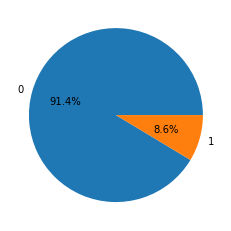

In [159]:
unique_labels = np.unique(complete_data[class_prediction])
plt.pie(np.array([len(complete_data[complete_data[class_prediction]==label]) for label in unique_labels ]), labels = list(unique_labels), autopct='%1.1f%%')

The distribution of the two classes is not balanced at all : it will be challenging because most of the patients in the dataset haven t hospital mortality.

# Part 1.2  Data cleaning, missing values, changes representation and visualization

We have the column number 83 that is empty so we will delete it. 
In addition, we will also remove the feature encounter_id and patient_id becuse theey are unique for each patient and do not have impact on the prediction of the future model we will build.

In [160]:
complete_data.drop(complete_data.columns[[0,1,83]], axis=1, inplace=True) #delete feature 83


In [161]:
#partition of features based on original data

# WITH BMI
numerical_features = ["age", "bmi","height", "weight",  
                      "pre_icu_los_days", "gcs_eyes_apache","apache_2_diagnosis",
                      "gcs_motor_apache", "gcs_verbal_apache", "heart_rate_apache",
                     "map_apache", "resprate_apache", "temp_apache", "d1_diasbp_max",
                      "d1_diasbp_min","d1_diasbp_noninvasive_max", "d1_diasbp_noninvasive_min",
                      "d1_heartrate_max", "d1_heartrate_min", "d1_mbp_max", "d1_mbp_min", 
                      "d1_mbp_noninvasive_max", "d1_mbp_noninvasive_min", "d1_resprate_max", "d1_resprate_min",
                      "d1_spo2_max", "d1_spo2_min", "d1_sysbp_max", "d1_sysbp_min",
                      "d1_sysbp_noninvasive_max", "d1_sysbp_noninvasive_min", "d1_temp_max", "d1_temp_min",
                      "h1_diasbp_max", "h1_diasbp_min", "h1_diasbp_noninvasive_max", "h1_diasbp_noninvasive_min",
                      "h1_heartrate_max", "h1_heartrate_min", "h1_mbp_max", "h1_mbp_min",
                      "h1_mbp_noninvasive_max", "h1_mbp_noninvasive_min", "h1_resprate_max", "h1_resprate_min",
                      "h1_spo2_max", "h1_spo2_min", "h1_sysbp_max", "h1_sysbp_min",
                      "h1_sysbp_noninvasive_max", "h1_sysbp_noninvasive_min", "d1_glucose_max", "d1_glucose_min",
                      "d1_potassium_max", "d1_potassium_min", "apache_4a_hospital_death_prob", "apache_4a_icu_death_prob"]

categorial_features = ["hospital_id", "ethnicity", "gender", "icu_admit_source", "apache_3j_bodysystem", "apache_2_bodysystem"]

binary_features = ["arf_apache", "gcs_unable_apache", "intubated_apache", 
                   "ventilated_apache", "elective_surgery", "gender", "apache_post_operative",
                   "aids", "cirrhosis", "diabetes_mellitus", "hepatic_failure", "immunosuppression",
                   "leukemia", "lymphoma", "solid_tumor_with_metastasis"]

array([[<AxesSubplot:title={'center':"('age',)"}>,
        <AxesSubplot:title={'center':"('bmi',)"}>,
        <AxesSubplot:title={'center':"('height',)"}>,
        <AxesSubplot:title={'center':"('weight',)"}>,
        <AxesSubplot:title={'center':"('pre_icu_los_days',)"}>,
        <AxesSubplot:title={'center':"('gcs_eyes_apache',)"}>,
        <AxesSubplot:title={'center':"('apache_2_diagnosis',)"}>,
        <AxesSubplot:title={'center':"('gcs_motor_apache',)"}>],
       [<AxesSubplot:title={'center':"('gcs_verbal_apache',)"}>,
        <AxesSubplot:title={'center':"('heart_rate_apache',)"}>,
        <AxesSubplot:title={'center':"('map_apache',)"}>,
        <AxesSubplot:title={'center':"('resprate_apache',)"}>,
        <AxesSubplot:title={'center':"('temp_apache',)"}>,
        <AxesSubplot:title={'center':"('d1_diasbp_max',)"}>,
        <AxesSubplot:title={'center':"('d1_diasbp_min',)"}>,
        <AxesSubplot:title={'center':"('d1_diasbp_noninvasive_max',)"}>],
       [<AxesSubplot:title

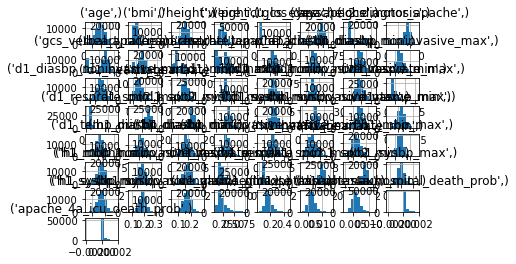

In [162]:
#data distribution - numerical features
normalize_data = complete_data[numerical_features]
normalize_data = normalize_data.dropna()
#normalize_data.head(30)
# for feature in numerical_features:
#     preprocessing.normalize([normalize_data[feature]])
    
normalize_data = preprocessing.normalize(normalize_data)
df_norm = pd.DataFrame(normalize_data, columns = [numerical_features])


#normalize_data.hist(alpha=1, figsize=(30, 20))
#plt.hist(normalize_data, bins='auto')
#plt.tight_layout()
#plt.show()
df_norm.hist()


## Categorical features

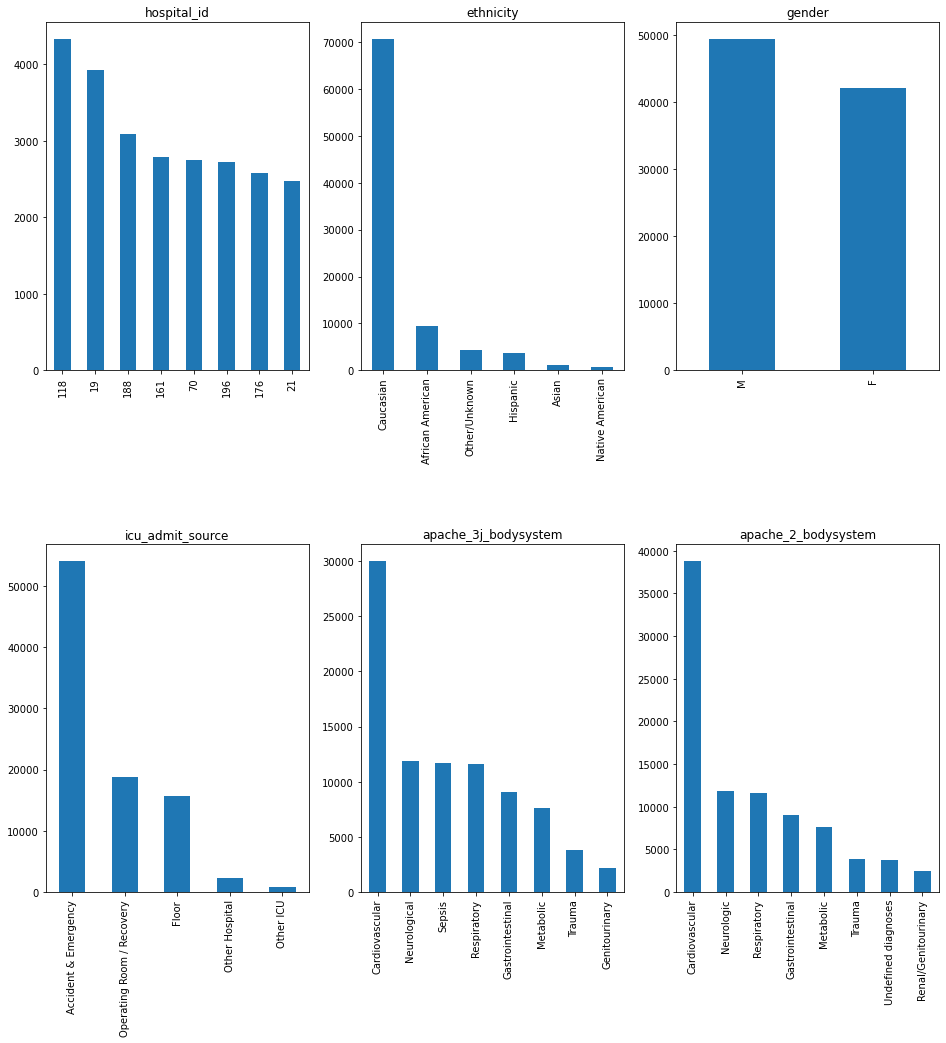

In [169]:
#generate a figures grid:
fig, axes = plt.subplots(2,3,figsize=(16,16))
fig.subplots_adjust(hspace=0.5)

#we will create a histogram for each categorical attribute
n=len(categorial_features)
num_rows = 3
max_bars = 8

for i,variable in enumerate(categorial_features):
    #calculate the current place on the grid
    r=int(i/num_rows)
    c=i%num_rows
    
    #create the "value counts" for the first <max_bars> categories:
    u=min(complete_data[variable].nunique(),max_bars)
    vc = complete_data[variable].value_counts()[:u]
    
    # plot a bar chart using Pandas
    vc.plot(kind='bar',ax=axes[r,c],title=variable)

apache3j and apage 2 really close!!!!!!!!!! => check influence on model and maybe remove one of them

## Age of patient

C:\Users\eva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\eva\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


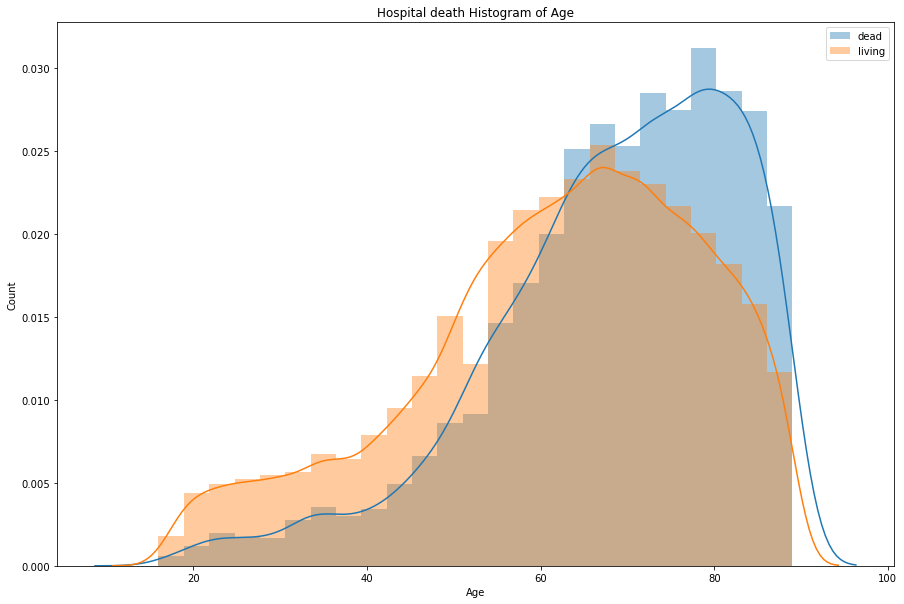

In [175]:

dead_patient = complete_data[complete_data["hospital_death"] == 1]
living_patient =  complete_data[complete_data["hospital_death"] == 0]
#first we create the figure using Matplotlib
fig,ax=plt.subplots(figsize=(15,10))
#"age"
#create two histograms using Seaborn:
sns.distplot(dead_patient.age, bins = 25, kde = True, label = "dead",ax=ax)
sns.distplot(living_patient.age, bins = 25, kde = True, label = "living",ax=ax)

#Don't forget to make titles for the figure and axes
plt.title('Hospital death Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(loc="upper right")

# Missing values

Let s check number of missing values in each features

In [ ]:
pd.set_option('display.max_rows', 100)
complete_data.isnull().sum(axis=0).sort_values(ascending=False)

We have many missing values so we need to find how to fill them or deal with them.

In [ ]:
complete_data.shape[0] - complete_data.dropna().shape[0]

Around third of rows have missing values!
In this project the classification is binary so let s check the repartition of missing values dpeending on the classification.

In [ ]:
missing_data = complete_data[complete_data.isnull().any(axis=1)]
missing_data['hospital_death'].value_counts()

Most of missing values are in the class 0 (class of no hospital death - living) which we have a lot.
In the case they belongs to the class 1 (hospital death) we will try to fill it or change the representation of the data.
Missing data in class 1 is more critic so we will first try to focus on them.

In [ ]:
# dead_rows = complete_data 
# dead_rows.drop(complete_data[complete_data['hospital_death'] == 0].index, inplace = True)
# dead_rows.isnull().sum(axis=0).sort_values(ascending=False)

features_with_missing_values_for_dead = ['d1_potassium_min','d1_potassium_max','age', 
                                    'h1_mbp_noninvasive_min','h1_mbp_noninvasive_max',
                                    'temp_apache','apache_4a_hospital_death_prob',
                                    'h1_diasbp_noninvasive_min', 'h1_diasbp_noninvasive_max',
                                    'h1_sysbp_noninvasive_max','h1_sysbp_noninvasive_min',
                                    'd1_glucose_min','d1_glucose_max','h1_spo2_min','h1_spo2_max',
                                    'bmi','h1_mbp_max','h1_mbp_min','h1_resprate_max',
                                    'h1_resprate_min','gcs_motor_apache',
                                    'gcs_verbal_apache','gcs_eyes_apache','d1_temp_max','d1_temp_min',
                                    'h1_diasbp_min','h1_diasbp_max','h1_sysbp_min',
                                    'h1_sysbp_max','weight','h1_heartrate_min','h1_heartrate_max',
                                    'height','apache_3j_bodysystem','apache_2_bodysystem',
                                    'apache_2_diagnosis','d1_mbp_noninvasive_max',
                                    'd1_mbp_noninvasive_min','apache_3j_diagnosis',
                                    'gcs_unable_apache','map_apache','resprate_apache',
                                    'd1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min',
                                    'd1_sysbp_noninvasive_min','d1_sysbp_noninvasive_max',
                                    'heart_rate_apache','ethnicity','lymphoma','aids','cirrhosis',
                                    'solid_tumor_with_metastasis'',immunosuppression',
                                    'leukemia','arf_apache','intubated_apache','hepatic_failure',
                                    'ventilated_apache','diabetes_mellitus','d1_spo2_min',
                                    'd1_spo2_max','d1_resprate_max','d1_resprate_min','d1_sysbp_min',
                                    'd1_diasbp_min','d1_diasbp_max','d1_sysbp_max','d1_mbp_min',
                                    'd1_mbp_max','d1_heartrate_min','d1_heartrate_max',
                                    'icu_admit_source','gender']

Let s try to find a way to fill missing values, we will check possible values in the dataset and we will try to find the better way to fill them.

## **The bmi case**
We can see that bmi has many missing values but we can calculate it because it depends on 2 other feature: height and weigh.
BMI is a measurement of a person's leanness or corpulence based on their height and weight, and is intended to quantify tissue mass.
The formula is weigh / height^2

In [ ]:
bmi_set = complete_data[['bmi','weight','height']]
bmi_set[bmi_set.isnull().any(axis=1)].head(20)

We can see that we can t fill bmi by calculating with height and weight because they are also missing
In addition we will separate values in category because numbers are not to much important but different define different type of corpulence which can be easier be understable by the model.

In [ ]:
#create a column to know where bmi is missing
complete_data['missing bmi'] = (complete_data['bmi'].isnull()).astype(int)
complete_data['missing bmi']
complete_data['bmi'].fillna(100,inplace=True) #will be remove then
complete_data.head(10) #last feature at extreme right side

In [ ]:
bmi_cat = ['Severe Thinness', 'Moderate Thinness','Mild Thinness','Normal', 
           'Overweight','Obese l1',"Obese l2"," Obese l3","missing bmi 2"]
category_bmi = pd.cut(complete_data['bmi'], bins=[0,16,17,18.5,25,30,35,40,80,100], 
                      labels=bmi_cat)
complete_data.insert(9,'bmi group',category_bmi)
complete_data.drop('bmi', inplace=True, axis=1)
numerical_features.remove("bmi")

In [ ]:
complete_data = pd.get_dummies(complete_data,columns=['bmi group'])
complete_data.drop('bmi group_missing bmi 2', inplace=True, axis=1) 

complete_data.head(15) #look at new column bmi group 

## **Give meaning to the data: The GCS case** 
This test gives a score that helps to know how much a person is in danger to die: we will try to add the result to the data because it s not given in the original data: we have only score for each component of the test: eyes, motor and verbal.

In [ ]:
def generate_gcs_score(row): #sum each component
   return row['gcs_motor_apache']+row['gcs_verbal_apache']+row['gcs_eyes_apache']

In [ ]:
gcs_params = ['gcs_motor_apache', 'gcs_verbal_apache', 'gcs_verbal_apache', 'gcs_eyes_apache']
gcs_data = complete_data[gcs_params]
complete_data['gcs_score']=complete_data.apply(generate_gcs_score,axis=1)
complete_data['gcs_score'] 

GCS - Glasgow Coma Scale : clinical scale used to reliably measure a person's level of consciousness after a brain injury. 
The score can be between 3 and 15 and can be separate in category:
- 3-8 severe
- 9-12 moderate
- 13-15 mild

=> Low score is correlated with higher risk of death.

So let s make it like the bmi

In [ ]:
gcs_cat = ['Severe', 'Moderate','Mild']
category_gcs = pd.cut(complete_data['gcs_score'], bins=[3,8,12,15], 
                      labels=gcs_cat)
complete_data.insert(3,'gcs group',category_gcs)

In [ ]:
complete_data = pd.get_dummies(complete_data,columns=['gcs group'])
gcs_set = complete_data[['gcs_score','gcs group_Moderate','gcs group_Severe', 
                         'gcs group_Mild','gcs_unable_apache']]
gcs_set.head(15)

Deal with missing value : we will add binary column which will tell when there is a missing values.

In [ ]:
features_with_missing_values = complete_data.columns[complete_data.isnull().any()]
for f in features_with_missing_values:
    name = "missing " + f
    if f in numerical_features:
        complete_data[name] = (complete_data[f].isnull()).astype(int)
complete_data.head(10)

# Encode categorical data

In [ ]:
complete_data = pd.get_dummies(complete_data,columns=categorial_features)
#reminder: categorial_features = ["hospital_id", "ethnicity", "gender", "icu_admit_source", "apache_3j_bodysystem", "apache_2_bodysystem"]
complete_data.info(verbose=True) #at the end of the list: new columns for categorical features

# Data visualization

## Different score for survival prediction: apache diagnosis and GSC score.

In [ ]:

scores_set = complete_data[[s, "hospital_death"]]
x = scores_set.groupby(['ventilated_apache',1]).size().to_frame('occurences').reset_index()
#define data
print(x)



# data = [15, 25, 25, 30, 5]
# labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']

# #define Seaborn color palette to use
# colors = sns.color_palette('pastel')[0:5]

# #create pie chart
# plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
# plt.show()

In [ ]:
score_list = ['ventilated_apache'] #can add other feature
plt.figure(figsize=(20,18))

for i,s in enumerate(score_list, 1):
    scores_set = complete_data[[s, "hospital_death"]]
    plt.subplot(1,1,i)
    x = scores_set.groupby(["hospital_death",s]).size().to_frame('occurences').reset_index()
    colors = sns.color_palette('pastel')[0:5]

    #create pie chart
    plt.pie(x, labels = s, colors = colors, autopct='%.0f%%')
    plt.show()

## Correlations

In [193]:

corr = complete_data[numerical_features].corr()
corr.style.background_gradient(cmap="GnBu")
sorted_mat = corr.unstack().sort_values()
strong_pairs = sorted_mat[abs(sorted_mat) > 0.4]

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(strong_pairs)


apache_4a_hospital_death_prob  gcs_motor_apache                -0.440726
gcs_motor_apache               apache_4a_hospital_death_prob   -0.440726
apache_4a_icu_death_prob       gcs_motor_apache                -0.428237
gcs_motor_apache               apache_4a_icu_death_prob        -0.428237
gcs_eyes_apache                apache_4a_hospital_death_prob   -0.411935
apache_4a_hospital_death_prob  gcs_eyes_apache                 -0.411935
                               gcs_verbal_apache               -0.400620
gcs_verbal_apache              apache_4a_hospital_death_prob   -0.400620
d1_mbp_noninvasive_max         h1_sysbp_noninvasive_min         0.400200
h1_sysbp_noninvasive_min       d1_mbp_noninvasive_max           0.400200
map_apache                     h1_sysbp_noninvasive_min         0.400897
h1_sysbp_noninvasive_min       map_apache                       0.400897
temp_apache                    d1_temp_max                      0.402646
d1_temp_max                    temp_apache         

In [194]:
corr.style.background_gradient(cmap="GnBu")

,age,bmi,height,weight,pre_icu_los_days,gcs_eyes_apache,apache_2_diagnosis,gcs_motor_apache,gcs_verbal_apache,heart_rate_apache,map_apache,resprate_apache,temp_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob
age,1.000000,-0.087077,-0.109937,-0.127252,0.049872,0.026363,0.022914,0.025843,-0.017829,-0.149495,-0.015870,0.037328,-0.082265,-0.062958,-0.211598,-0.060418,-0.209291,-0.135417,-0.143705,0.006123,-0.131755,0.006198,-0.130206,0.032206,0.034439,-0.038621,-0.084488,0.107642,-0.060160,0.107016,-0.060322,-0.082764,-0.070002,-0.147122,-0.200129,-0.136832,-0.193331,-0.164788,-0.165454,-0.059301,-0.108958,-0.057717,-0.103732,0.028071,0.029975,-0.061144,-0.073128,0.047645,-0.005169,0.047147,-0.003227,0.012538,0.067118,0.061185,0.111465,0.143167,0.076275
bmi,-0.087077,1.000000,-0.056316,0.877339,-0.001531,0.012927,0.026047,0.021091,0.028515,-0.021118,0.055916,0.001725,0.038597,0.054402,-0.007599,0.055270,-0.007641,-0.030567,0.015819,0.062054,0.015275,0.062675,0.015640,0.003844,-0.010762,-0.068978,-0.024743,0.081232,0.052352,0.081863,0.053080,0.023077,0.035808,0.032378,0.006165,0.032497,0.003592,-0.015905,-0.004584,0.039207,0.019265,0.039372,0.019839,0.005343,-0.005702,-0.057469,-0.032379,0.059600,0.045603,0.061362,0.046477,0.099805,0.134702,0.087240,0.093457,-0.033546,-0.013796
height,-0.109937,-0.056316,1.000000,0.391967,-0.008075,-0.008601,0.001630,-0.013907,0.009360,-0.024712,0.033535,-0.056965,0.014942,0.034153,0.136789,0.034445,0.137583,-0.020743,-0.029260,0.021502,0.093622,0.022127,0.095100,-0.026289,-0.059500,-0.024351,0.008570,-0.005414,0.048863,-0.005550,0.050273,0.023336,0.005733,0.076047,0.104503,0.077049,0.110904,-0.011921,-0.017024,0.048265,0.063877,0.051156,0.069602,-0.036836,-0.050104,-0.011966,-0.000643,0.006483,0.013223,0.006578,0.017250,-0.009891,0.017338,0.053411,0.062596,-0.029071,-0.011588
weight,-0.127252,0.877339,0.391967,1.000000,-0.004423,0.008699,0.026648,0.013837,0.030524,-0.031767,0.068163,-0.022152,0.043359,0.067853,0.053190,0.068816,0.053515,-0.038491,0.000898,0.070165,0.055879,0.071025,0.057039,-0.006198,-0.035975,-0.075236,-0.020837,0.076664,0.071931,0.077267,0.073318,0.032039,0.036138,0.063878,0.052400,0.064418,0.052612,-0.021803,-0.013121,0.059416,0.047407,0.060722,0.050499,-0.010327,-0.026046,-0.061459,-0.031966,0.060676,0.050949,0.062412,0.053585,0.090293,0.134588,0.104413,0.113316,-0.043706,-0.018303
pre_icu_los_days,0.049872,-0.001531,-0.008075,-0.004423,1.000000,-0.024837,0.086303,-0.014105,-0.045830,0.050570,-0.033403,0.017839,0.008597,-0.053192,-0.042209,-0.052255,-0.042488,0.060808,0.056653,-0.051702,-0.046880,-0.055338,-0.046501,0.030759,0.008907,0.027262,-0.024452,-0.037651,-0.045931,-0.040016,-0.045438,0.039215,-0.002172,-0.056987,-0.056853,-0.053414,-0.054206,0.056704,0.054813,-0.052378,-0.058430,-0.055092,-0.058425,0.027938,0.028913,0.003512,-0.011810,-0.040574,-0.049530,-0.043678,-0.049405,-0.003987,-0.007782,0.030315,0.020039,0.058722,0.037219
gcs_eyes_apache,0.026363,0.012927,-0.008601,0.008699,-0.024837,1.000000,0.046596,0.800127,0.779128,-0.093994,0.001585,0.005172,0.150900,-0.031842,0.114988,-0.033161,0.113183,-0.139856,0.015462,-0.015865,0.139784,-0.014290,0.138821,-0.040704,0.072163,-0.098026,0.090901,-0.020992,0.166986,-0.019118,0.165584,-0.143425,0.212162,-0.0

# Conclusion

What we will do now:

Challenges for data engineering:
-	Understand which features more influence or not and find the best representation based on model results
-	Dealing with missing values more precisely

Challenges for model:
-	Improve precision and results of the model
-	Distribution of classes for prediction: analyze outliers and more
